In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [9]:
inputs = Input(shape=(1,), name="input_layer")
h1 = Dense(64, activation='relu', name="hidden_layer_1")(inputs)
h2 = Dense(128, activation='relu', name="hidden_layer_2")(h1)
h3 = Dense(64, activation='relu', name="hidden_layer_3")(h2)
h4 = Dense(128, activation='relu', name='hidden_layer_4')(h3)
outputs = Dense(1, name="output_layer")(h4)
model = Model(inputs=inputs, outputs=outputs, name="simple_model")
model.summary(show_trainable=True)

Model: "simple_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 1)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_1 (Dense)      │ (None, 64)            │        128 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_2 (Dense)      │ (None, 128)           │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_3 (Dense)      │ (None, 64)            │      8,256 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_4 (Dense)      │ (None, 128)           │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ output_layer (Dense)        │ (None, 1)             │        129 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 25,153 (98.25 KB)

 Trainable params: 25,153 (98.25 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
import numpy as np
def square(x):
    return ((x**2) + (3 * x) + 2)

# # Data Process 
# n = 10000
# y = []
# x = np.random.randint(0, n , n)
# for i in range(n):
#     y.append(square(x[i]))
# y = np.array(y)
# print(x)
# print(y)

# n = np.linspace(-1000, 10000, 100000)
# n = np.random.permutation(n)
# x = n.reshape(-1, 1)
# y = square(n).reshape(-1, 1)


x = np.linspace(-200, 200 , 10000)
x = np.random.permutation(x)

y = square(x)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
print(len(x))
print(len(y))





10000
10000


In [43]:
# Prepare Trainning , Validation , Test Set
total_n = len(x)
train_n = int(total_n * 0.7)
val_n   = int(total_n * 0.1)
test_n  = int(total_n * 0.2)

trainX  = x[:train_n]
trainY  = y[:train_n]

valX    = x[train_n : train_n + val_n]
valY    = y[train_n : train_n + val_n]

testX   = x[train_n + val_n : train_n + val_n + test_n]
testY   = y[train_n + val_n : train_n + val_n + test_n]

In [44]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(trainX, trainY, validation_data= (valX, valY), epochs=200)


Epoch 1/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1031436.4375 - mae: 392.9144 - val_loss: 10975.8848 - val_mae: 80.2964
Epoch 2/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13606.5283 - mae: 90.5613 - val_loss: 10275.3486 - val_mae: 74.2619
Epoch 3/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 13268.1426 - mae: 88.1981 - val_loss: 25138.3867 - val_mae: 128.3922
Epoch 4/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27863.7285 - mae: 130.3121 - val_loss: 18805.5977 - val_mae: 108.2523
Epoch 5/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 128674.4766 - mae: 261.5477 - val_loss: 98453.7031 - val_mae: 282.0700
Epoch 6/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 62150.5469 - mae: 189.9701 - val_loss: 13640.0762 - val_mae: 90.9089
Epoch 7/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 40305.6328 - mae: 153.7595 - val_loss: 208549.4844 - val_mae: 372.5430
Epoch 8/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 751123.4375 - mae: 669.

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


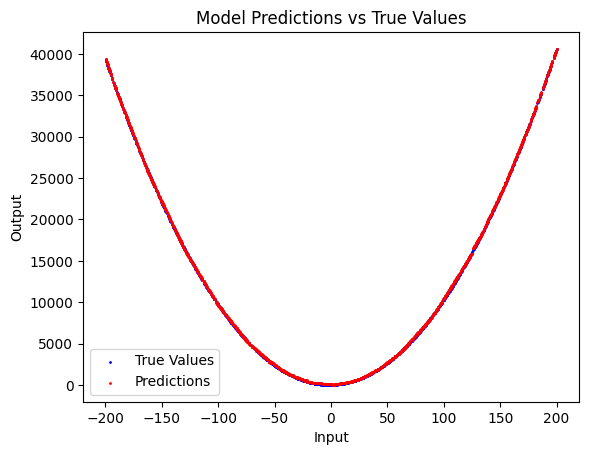

In [45]:
#testing the model
predictions = model.predict(testX)
import matplotlib.pyplot as plt
plt.scatter(testX, testY, label='True Values', color='blue', s=1)
plt.scatter(testX, predictions, label='Predictions', color='red', s=1)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Model Predictions vs True Values')
plt.legend()
plt.show()
# Save the model
model.save('PredictionModel.keras')

In [47]:
testV = 1000
Expected = square(testV)

# Make testV a 2D array with shape (1, 1)
predicted = model.predict(np.array([[testV]]))

print(f"Expected: {Expected}, Predicted: {predicted[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Expected: 1003002, Predicted: -161425.890625
